In [7]:
import sys
sys.path.append('../')
from utility.file_utility import FileUtility
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline 


Populating the interactive namespace from numpy and matplotlib


In [96]:
crohn_IDS=[x.split('/')[-1].split('.')[0] for x in FileUtility.load_list('../../datasets/crohn/6-mers_rate_complete1359_seq_1000_meta')]
map_ERS_ERR={x.split()[4]:x.split()[2] for x in FileUtility.load_list('../../../datasets/deepbio/microbiome/crohn_disease/convert_value')[1::]}
map_IDS_ACC={x.split()[1]:x.split()[0] for x in FileUtility.load_list('../../../datasets/deepbio/microbiome/crohn_disease/labels')[1::]}

In [97]:
df=pd.read_table('/mounts/data/proj/asgari/dissertation/datasets/deepbio/microbiome/crohn_disease/mapping_files/2517_mapping_file.txt',index_col=0)


label_list=[]
for idx in crohn_IDS:
    try:
        label_list.append(df.loc[map_IDS_ACC[map_ERS_ERR[idx]]])
    except:
        label_list.append(0)
        print(idx)

In [98]:
filtered=[1 for x in label_list]
new_label=[1 if x['diagnosis']=='CD' else 0 for x in label_list]

In [99]:
idx=np.where(np.array(filtered)>0)
Y=[new_label[i] for i, v in enumerate(new_label) if i in idx[0]]


In [103]:
X=FileUtility.load_sparse_csr('../../datasets/crohn/6-mers_rate_complete1359_seq_-1.npz').toarray()
X=X[idx[0],:]
X_pca = PCA(n_components=50).fit_transform(X)
X_tsne = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1359 samples in 0.231s...
[t-SNE] Computed neighbors for 1359 samples in 11.458s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1359
[t-SNE] Computed conditional probabilities for sample 1359 / 1359
[t-SNE] Mean sigma: 0.005928
[t-SNE] Computed conditional probabilities in 0.135s
[t-SNE] Iteration 50: error = 69.3693695, gradient norm = 0.0000378 (50 iterations in 1.420s)
[t-SNE] Iteration 100: error = 66.0929337, gradient norm = 0.0026140 (50 iterations in 1.361s)
[t-SNE] Iteration 150: error = 65.8026581, gradient norm = 0.0000433 (50 iterations in 1.351s)
[t-SNE] Iteration 200: error = 65.8027267, gradient norm = 0.0000299 (50 iterations in 1.103s)
[t-SNE] Iteration 250: error = 65.8037033, gradient norm = 0.0000264 (50 iterations in 1.098s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.803703
[t-SNE] Iteration 300: error = 1.6782360, gradient norm = 0.0045364 (50 iterations in 1.166

In [104]:
X_WV=np.load('../../datasets/WV_16s.npz')['arr_0']
X=X.dot(X_WV)  
X_tsne_wv = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1359 samples in 0.039s...
[t-SNE] Computed neighbors for 1359 samples in 3.034s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1359
[t-SNE] Computed conditional probabilities for sample 1359 / 1359
[t-SNE] Mean sigma: 0.038376
[t-SNE] Computed conditional probabilities in 0.092s
[t-SNE] Iteration 50: error = 69.5785217, gradient norm = 0.0001081 (50 iterations in 1.068s)
[t-SNE] Iteration 100: error = 64.9601440, gradient norm = 0.0013564 (50 iterations in 1.283s)
[t-SNE] Iteration 150: error = 64.8330994, gradient norm = 0.0000359 (50 iterations in 1.133s)
[t-SNE] Iteration 200: error = 64.8326416, gradient norm = 0.0000220 (50 iterations in 1.181s)
[t-SNE] Iteration 250: error = 64.8326263, gradient norm = 0.0000229 (50 iterations in 1.300s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.832626
[t-SNE] Iteration 300: error = 1.6368595, gradient norm = 0.0046601 (50 iterations in 1.319s

In [90]:
def plot_scatter(ax, X, Y, x_label, y_label, title, legend_loc, label_dict=None, legend_size=7, legend_col=1):
    target=list(set(Y))
    target.sort()
    color_idx=[target.index(x) for x in Y]
    color_list=list(({'aliceblue':            '#F0F8FF','antiquewhite':         '#FAEBD7','aqua':                 '#00FFFF','aquamarine':           '#7FFFD4','azure':                '#F0FFFF','beige':                '#F5F5DC','bisque':               '#FFE4C4','black':                '#000000','blanchedalmond':       '#FFEBCD','blue':                 '#0000FF','blueviolet':           '#8A2BE2','brown':                '#A52A2A','burlywood':            '#DEB887','cadetblue':            '#5F9EA0','chartreuse':           '#7FFF00','chocolate':            '#D2691E','coral':                '#FF7F50','cornflowerblue':       '#6495ED','cornsilk':             '#FFF8DC','crimson':              '#DC143C','cyan':                 '#00FFFF','darkblue':             '#00008B','darkcyan':             '#008B8B','darkgoldenrod':        '#B8860B','darkgray':             '#A9A9A9','darkgreen':            '#006400','darkkhaki':            '#BDB76B','darkmagenta':          '#8B008B','darkolivegreen':       '#556B2F','darkorange':           '#FF8C00','darkorchid':           '#9932CC','darkred':              '#8B0000','darksalmon':           '#E9967A','darkseagreen':         '#8FBC8F','darkslateblue':        '#483D8B','darkslategray':        '#2F4F4F','darkturquoise':        '#00CED1','darkviolet':           '#9400D3','deeppink':             '#FF1493','deepskyblue':          '#00BFFF','dimgray':              '#696969','dodgerblue':           '#1E90FF','firebrick':            '#B22222','floralwhite':          '#FFFAF0','forestgreen':          '#228B22','fuchsia':              '#FF00FF','gainsboro':            '#DCDCDC','ghostwhite':           '#F8F8FF','gold':                 '#FFD700','goldenrod':            '#DAA520','gray':                 '#808080','green':                '#008000','greenyellow':          '#ADFF2F','honeydew':             '#F0FFF0','hotpink':              '#FF69B4','indianred':            '#CD5C5C','indigo':               '#4B0082','ivory':                '#FFFFF0','khaki':                '#F0E68C','lavender':             '#E6E6FA','lavenderblush':        '#FFF0F5','lawngreen':            '#7CFC00','lemonchiffon':         '#FFFACD','lightblue':            '#ADD8E6','lightcoral':           '#F08080','lightcyan':            '#E0FFFF','lightgoldenrodyellow': '#FAFAD2','lightgreen':           '#90EE90','lightgray':            '#D3D3D3','lightpink':            '#FFB6C1','lightsalmon':          '#FFA07A','lightseagreen':        '#20B2AA','lightskyblue':         '#87CEFA','lightslategray':       '#778899','lightsteelblue':       '#B0C4DE','lightyellow':          '#FFFFE0','lime':                 '#00FF00','limegreen':            '#32CD32','linen':                '#FAF0E6','magenta':              '#FF00FF','maroon':               '#800000','mediumaquamarine':     '#66CDAA','mediumblue':           '#0000CD','mediumorchid':         '#BA55D3','mediumpurple':         '#9370DB','mediumseagreen':       '#3CB371','mediumslateblue':      '#7B68EE','mediumspringgreen':    '#00FA9A','mediumturquoise':      '#48D1CC','mediumvioletred':      '#C71585','midnightblue':         '#191970','mintcream':            '#F5FFFA','mistyrose':            '#FFE4E1','moccasin':             '#FFE4B5','navajowhite':          '#FFDEAD','navy':                 '#000080','oldlace':              '#FDF5E6','olive':                '#808000','olivedrab':            '#6B8E23','orange':               '#FFA500','orangered':            '#FF4500','orchid':               '#DA70D6','palegoldenrod':        '#EEE8AA','palegreen':            '#98FB98','paleturquoise':        '#AFEEEE','palevioletred':        '#DB7093','papayawhip':           '#FFEFD5','peachpuff':            '#FFDAB9','peru':                 '#CD853F','pink':                 '#FFC0CB','plum':                 '#DDA0DD','powderblue':           '#B0E0E6','purple':               '#800080','red':                  '#FF0000','rosybrown':            '#BC8F8F','royalblue':            '#4169E1','saddlebrown':          '#8B4513','salmon':               '#FA8072','sandybrown':           '#FAA460','seagreen':             '#2E8B57','seashell':             '#FFF5EE','sienna':               '#A0522D','silver':               '#C0C0C0','skyblue':              '#87CEEB','slateblue':            '#6A5ACD','slategray':            '#708090','snow':                 '#FFFAFA','springgreen':          '#00FF7F','steelblue':            '#4682B4','tan':                  '#D2B48C','teal':                 '#008080','thistle':              '#D8BFD8','tomato':               '#FF6347','turquoise':            '#40E0D0','violet':               '#EE82EE','wheat':                '#F5DEB3','white':                '#FFFFFF','whitesmoke':           '#F5F5F5','yellow':               '#FFFF00','yellowgreen':          '#9ACD32'}).keys())
    color_list=['green','blue','red','gold', 'cyan']
    color_list=['#ff0505', '#f2a041', '#cdff05', '#04d9cb', '#45a8ff', '#8503a6', '#590202', '#734d02', '#4ab304', '#025359', '#0454cc', '#ff45da', '#993829', '#ffda45', '#1c661c', '#05cdff', '#1c2f66', '#731f57', '#b24a04', '#778003', '#0e3322', '#024566', '#0404d9', '#e5057d', '#66391c', '#31330e', '#3ee697', '#2d7da6', '#20024d', '#33011c']
    
    for current_color in range(len(target)):
        color=color_list
        current_idxs=[idx for idx,v in enumerate(color_idx) if v==current_color]
        if label_dict:
            ax.scatter(X[current_idxs, 0], X[current_idxs, 1], c=color[current_color], label=label_dict[target[current_color]], cmap='viridis', alpha=0.4, edgecolors=None)
        else:
            ax.scatter(X[current_idxs, 0], X[current_idxs, 1], c=color[current_color], label=target[current_color], cmap='viridis', alpha=0.4, edgecolors=None)
    xlabel(x_label)
    ylabel(y_label)
    plt.xticks([])
    plt.yticks([])
    ax.set_title(title)
    ax.legend(loc=legend_loc, prop={'size': legend_size},ncol=legend_col)


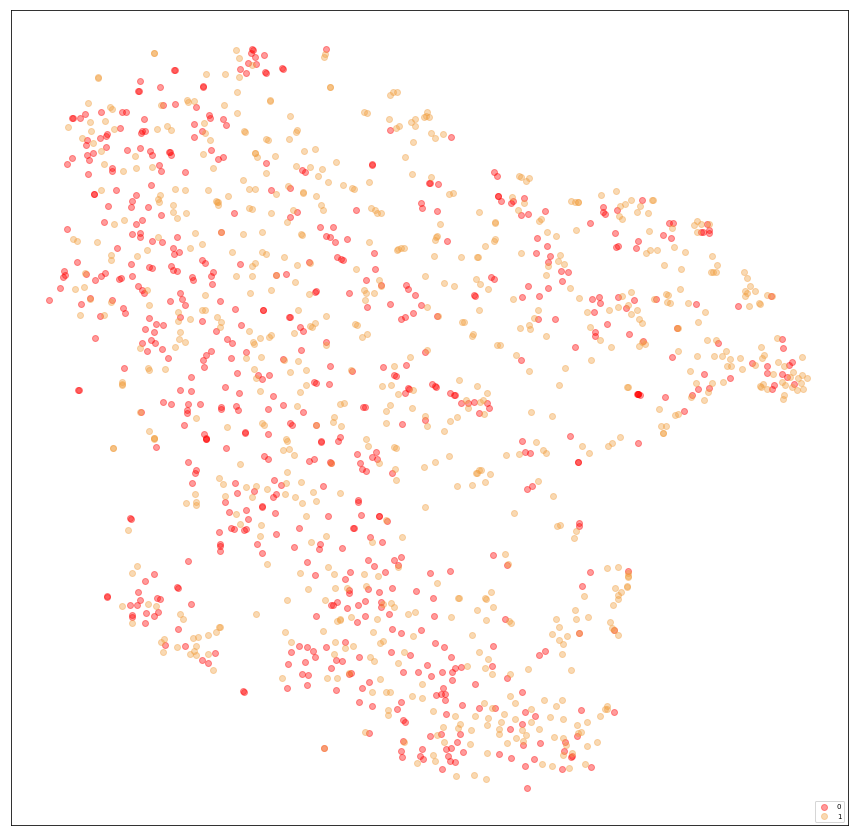

In [105]:
figure(figsize=(15,15))
ax=subplot(111)
plot_scatter(ax, X_tsne_wv, Y, '','','',4)

In [102]:
FileUtility.save_list('../../datasets/crohn/data_config/labels_disease_complete1359.txt',['CD' if l==1 else 'Not-CD' for l in Y])

In [93]:
from scipy import sparse

In [94]:
FileUtility.save_sparse_csr('../../datasets/crohn/6_mer_CD', sparse.csr_matrix(X))

In [95]:
X.shape

(1359, 4096)